In [3]:
image_folder='./output_crops'
output_folder='./output_crops/process'

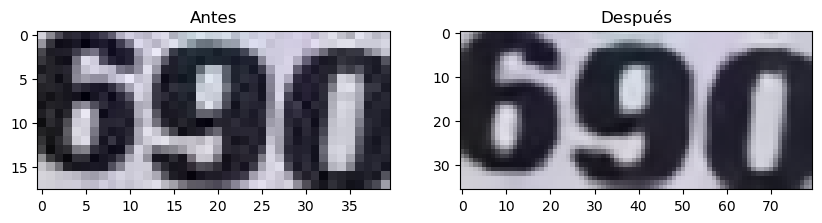

antes 690
despues 590


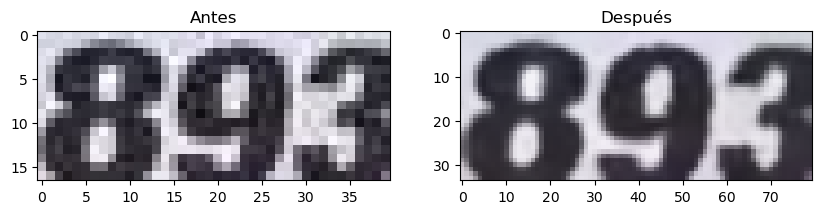

antes 893
despues 893


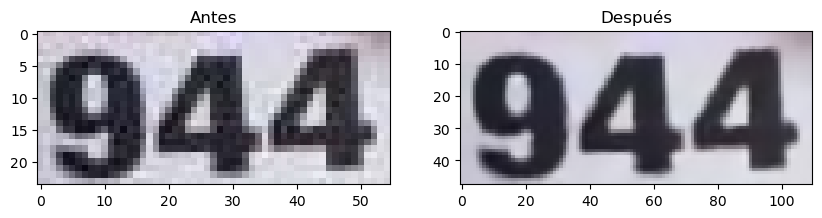

antes 944
despues 944


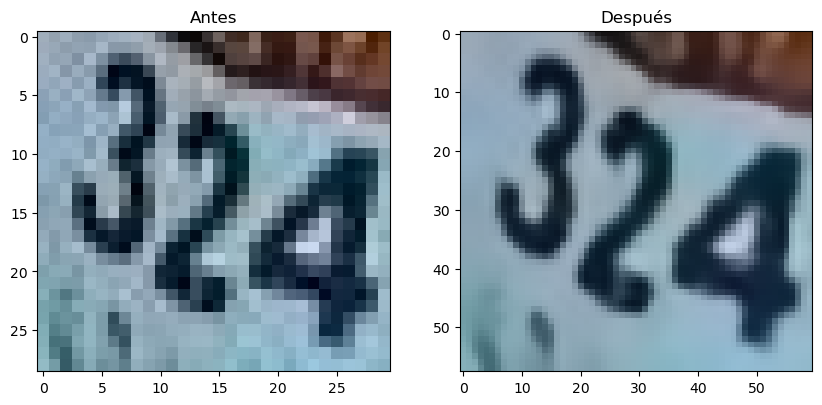

antes 324
despues 324


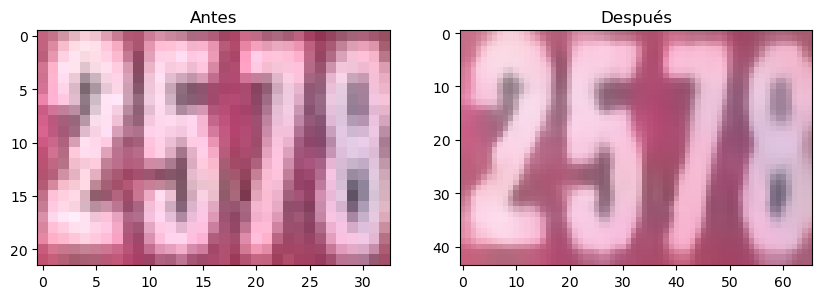

antes 2578
despues 2576


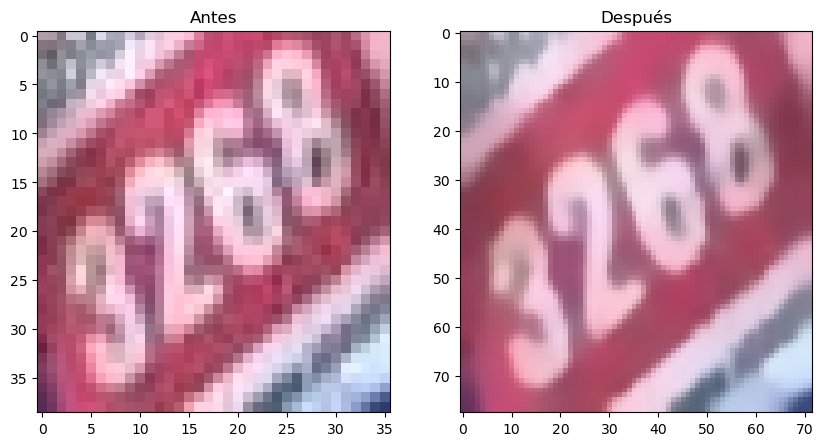

antes 8268
despues 8268


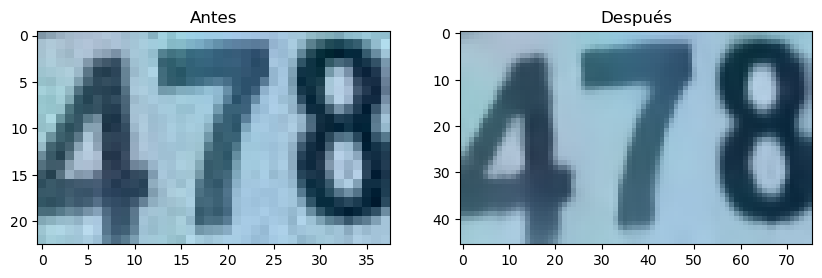

antes 478
despues 478


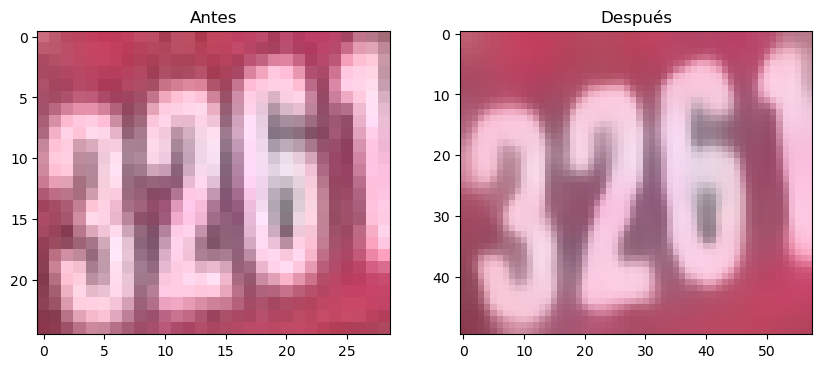

antes 3261
despues 326


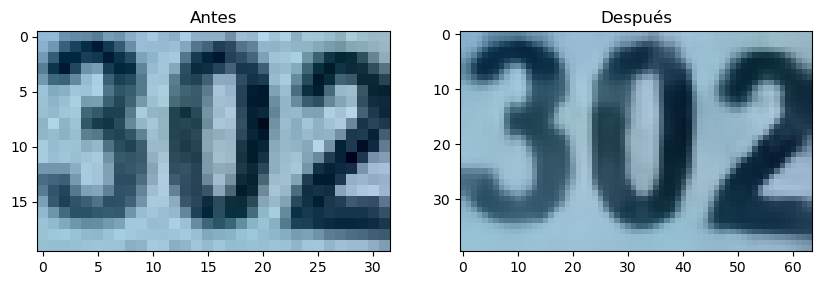

antes 302
despues 302


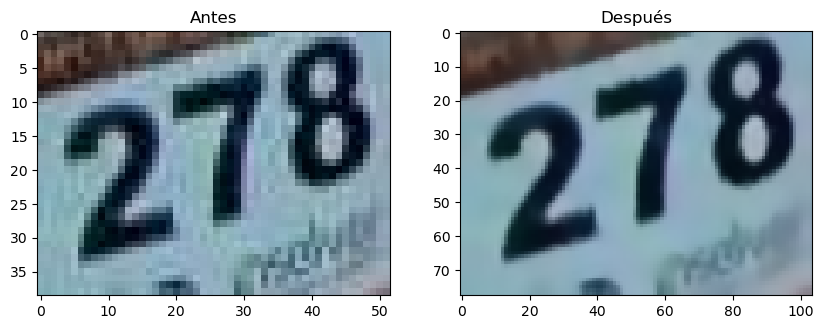

antes 278
despues 278


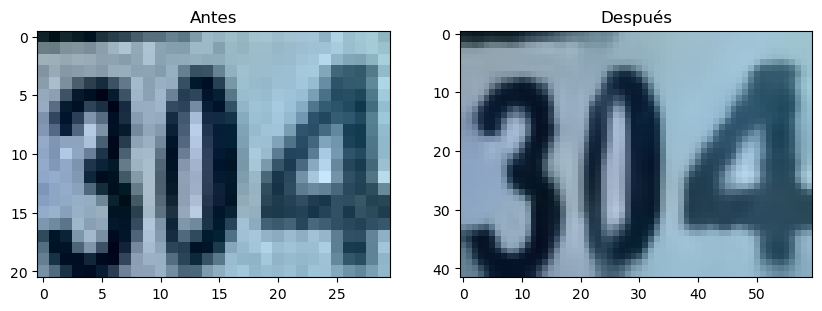

antes 304
despues 304


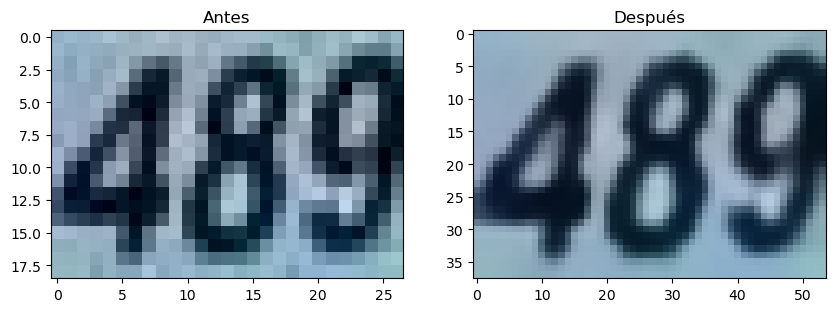

antes 489
despues 489


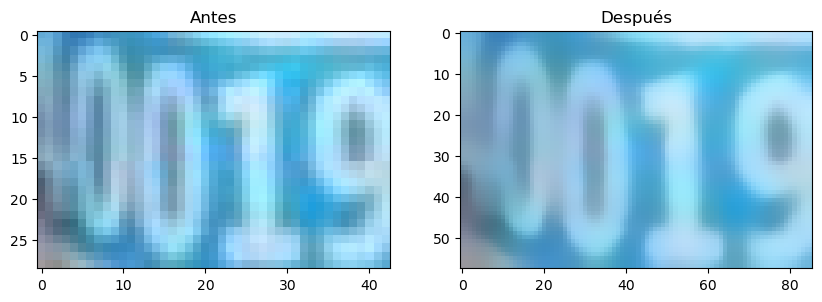

antes 007
despues 0079


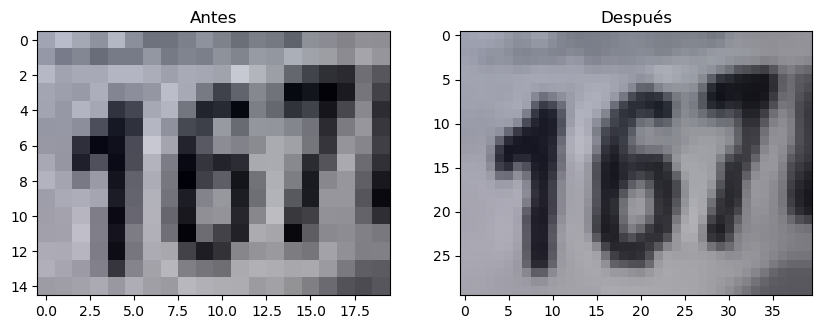

antes 167
despues 167


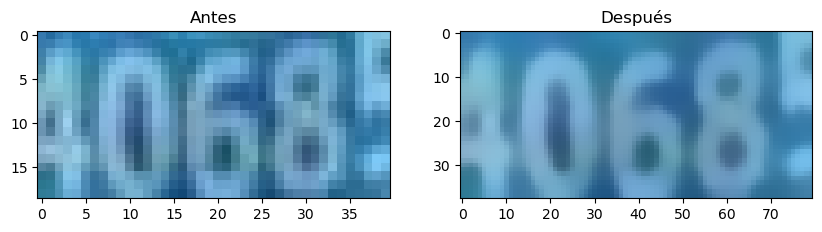

antes 4068
despues 1068


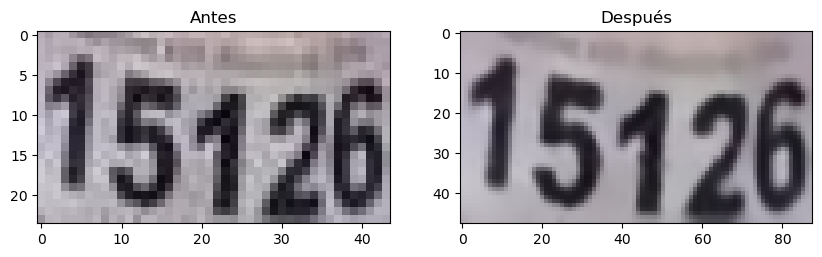

antes 15126
despues 15126


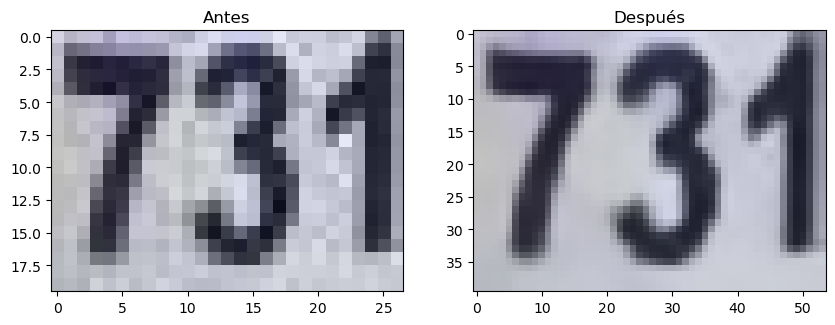

antes 731
despues 731


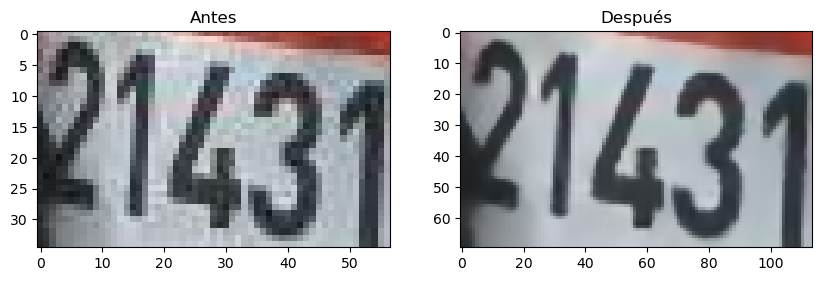

antes 21431
despues 21431


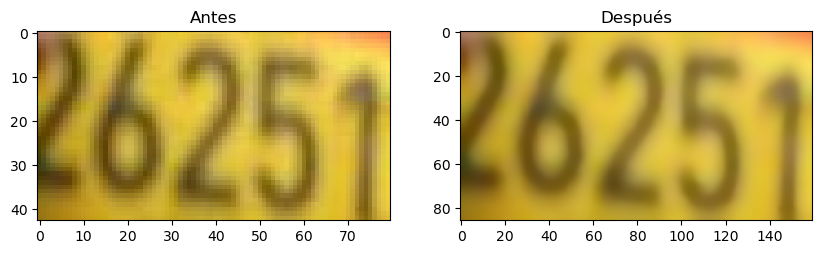

antes 26251
despues 26251


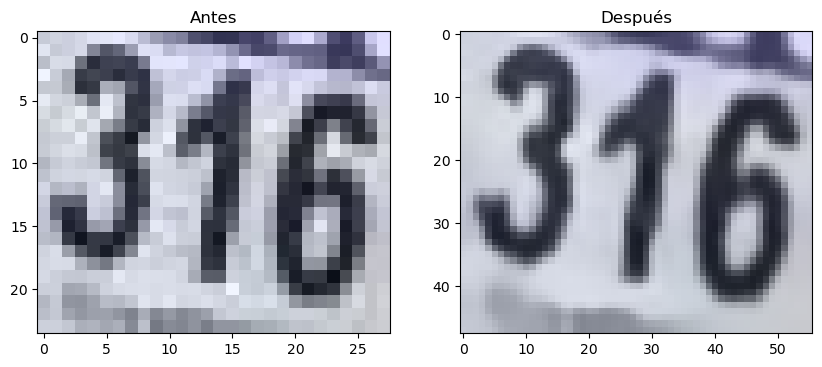

antes 316
despues 316


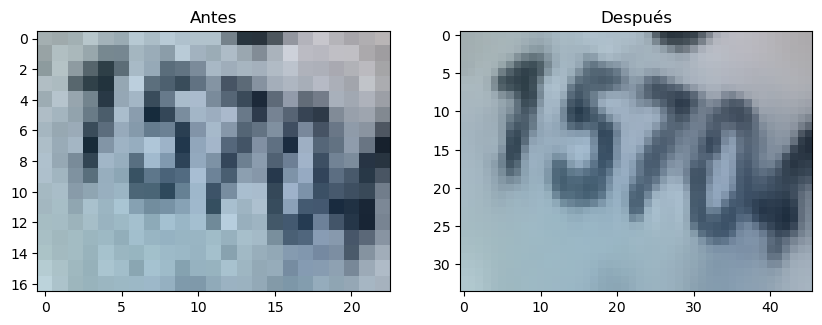

antes 1574
despues 0570


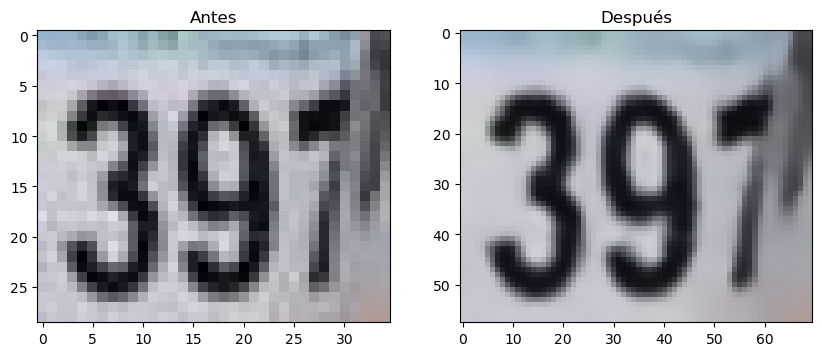

antes 391
despues 397


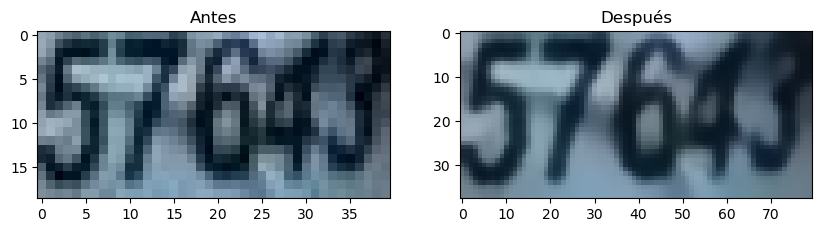

antes 57645
despues 57648


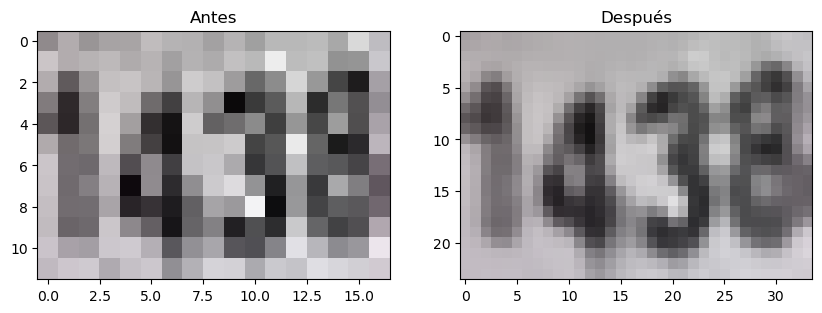

despues 1438


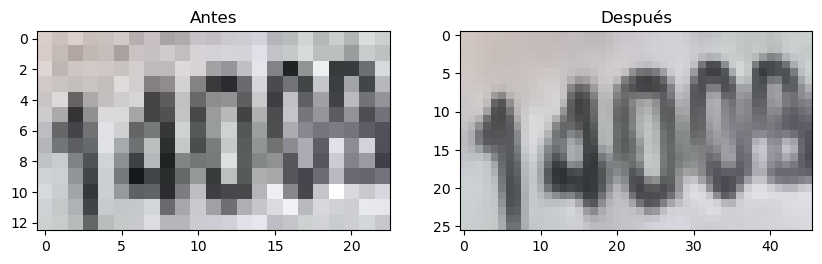

antes 44


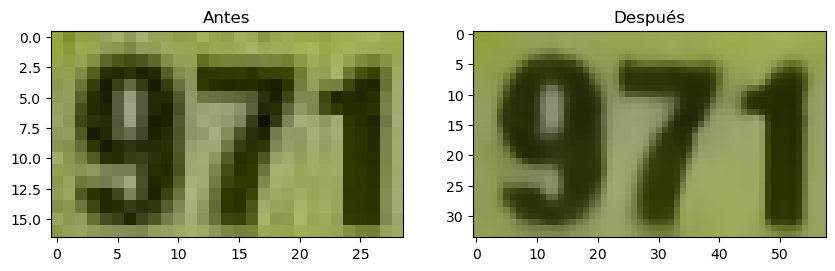

antes 971
despues 971


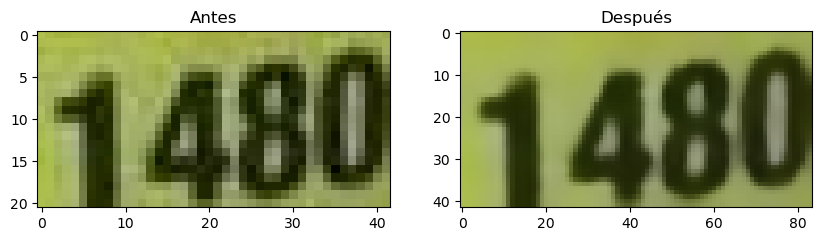

antes 1480
despues 1480


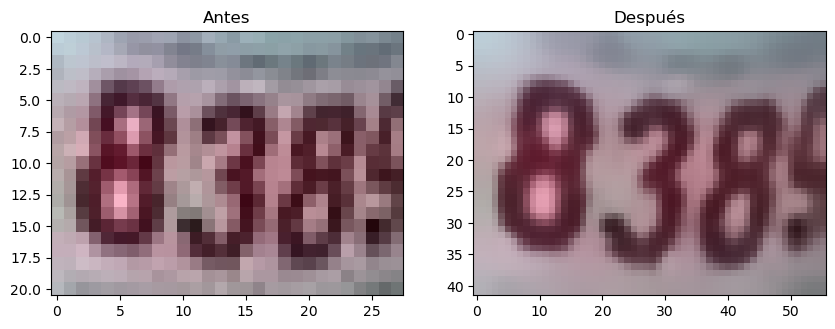

antes 8385
despues 838


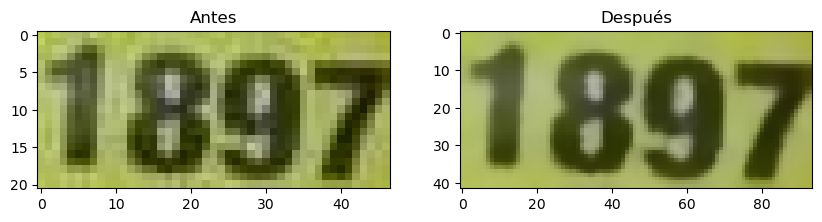

antes 1897
despues 1897


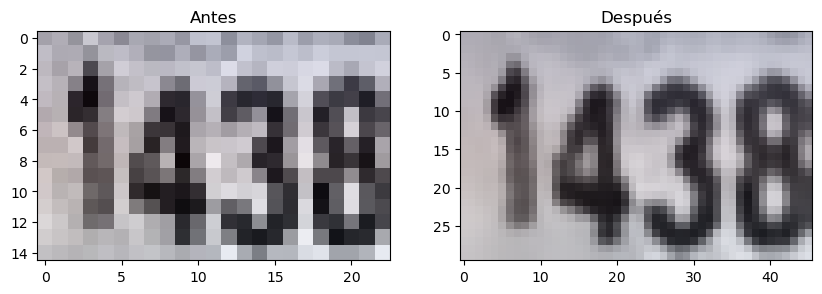

antes 1432
despues 1438


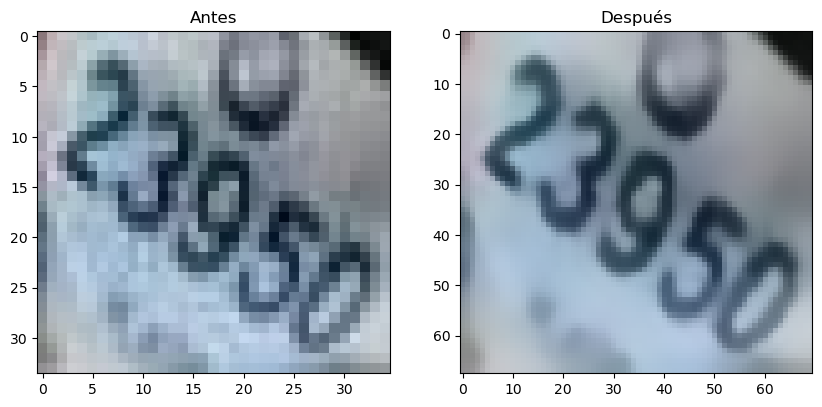

antes 23950
despues 63950


In [6]:
import cv2
import os
import easyocr
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import re

reader = easyocr.Reader(['en'])
# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Iterar sobre las imágenes en la carpeta
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Leer la imagen
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        
        # Redimensionar usando interpolación bicúbica
        upscale_img = cv2.resize(img, (0,0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        
        # Aplicar desenfoque bilateral
        blur_img = cv2.bilateralFilter(upscale_img, d=9, sigmaColor=75, sigmaSpace=75)
        
        # Guardar la imagen procesada
        output_path = os.path.join(output_folder, 'processed_' + filename)
        cv2.imwrite(output_path, blur_img)

        # Mostrar antes y después
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        plt.title("Antes")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        plt.subplot(1, 2, 2)
        plt.title("Después")
        plt.imshow(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB))
        
        plt.show()
        image_pil1 = Image.open(img_path)
        results1 = reader.readtext(np.array(image_pil1))
        for detection in results1:
                text = detection[1]
                numbers = re.findall(r'\d+', text)
                if numbers:
                    print('antes', numbers[0])
        
        image_pil = Image.open(output_path)
        results = reader.readtext(np.array(image_pil))
        for detection in results:
                text = detection[1]
                numbers = re.findall(r'\d+', text)
                if numbers:
                    print('despues',numbers[0])